<a href="https://colab.research.google.com/github/RuthCMoreno/Diplomado_IA/blob/main/S6_C2_ModeloRegresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Machine Learning Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive # Conectanonos con google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os #permite leer rutas de carpetas


In [4]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/archivosIA')

In [5]:
os.listdir()

['marketing_extract_2X_Income (1).xlsx']

In [6]:
df = pd.read_excel('marketing_extract_2X_Income (1).xlsx')

# Análisis descriptivo

In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   MntMeatProducts  2216 non-null   int64
 1   MntWines         2216 non-null   int64
 2   Income           2216 non-null   int64
dtypes: int64(3)
memory usage: 52.1 KB


In [8]:
df.shape

(2216, 3)

In [9]:
df.describe()

,MntMeatProducts,MntWines,Income
count,2216.000000,2216.000000,2216.000000
mean,166.995939,305.091606,52247.251354
std,224.283273,337.327920,25173.076661
min,0.000000,0.000000,1730.000000
25%,16.000000,24.000000,35303.000000
50%,68.000000,174.500000,51381.500000
75%,232.250000,505.000000,68522.000000
max,1725.000000,1493.000000,666666.000000


# Análisis exploratorio

Text(0, 0.5, 'Income: Ingreso anual')

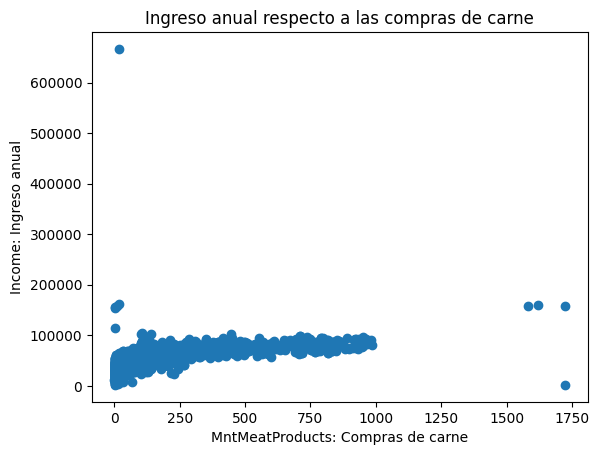

In [28]:
x = df['MntMeatProducts']
y = df['Income']
plt.scatter(x,y)
plt.title('Ingreso anual respecto a las compras de carne')
plt.xlabel('MntMeatProducts: Compras de carne')
plt.ylabel('Income: Ingreso anual')

# Datos atípicos Variable X : Compras de carne e Y : Ingreso anual

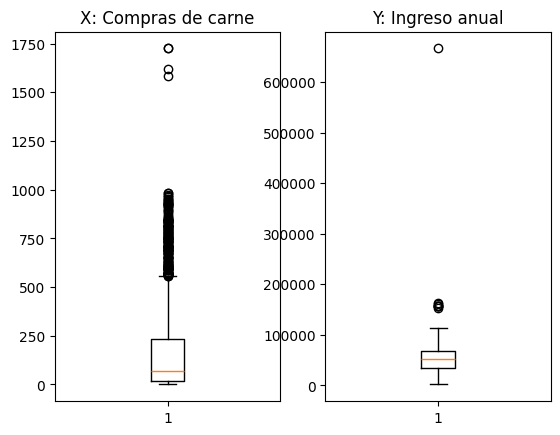

In [29]:
plt.subplot(1,2,1) #aquí estoy dividiendo en una fila dos columnas
plt.boxplot(x)
plt.title('X: Compras de carne')
plt.subplot(1,2,2)
plt.boxplot(y)
plt.title('Y: Ingreso anual')
plt.show()

In [30]:
x_Q1 = x.quantile(0.25)
x_Q3 = x.quantile(0.75)
x_IQR = x_Q3 - x_Q1

In [31]:
x_Q1

16.0

In [32]:
x_Q3

232.25

In [33]:
x_IQR

216.25

In [34]:
y_Q1 = y.quantile(0.25)
y_Q3 = y.quantile(0.75)
y_IQR = y_Q3 - y_Q1
#

ahora necesito una condición para eliminar los datos atípicos, basada en el rango intercuartílico obtenido para las variables x e y

In [42]:
df = df[(df['MntMeatProducts'] >= x_Q1 - 1.5*x_IQR) & (df['MntMeatProducts'] <= x_Q3 + 1.5*x_IQR)]  #x sería entonces el df comprendido en el rango
df = df[(df['Income'] >= y_Q1 - 1.5*y_IQR) & (df['Income'] <= y_Q3 + 1.5*y_IQR)]  #y sería entonces el df comprendido en el rango

# Datos procesados

Text(0, 0.5, 'Income: Ingreso anual')

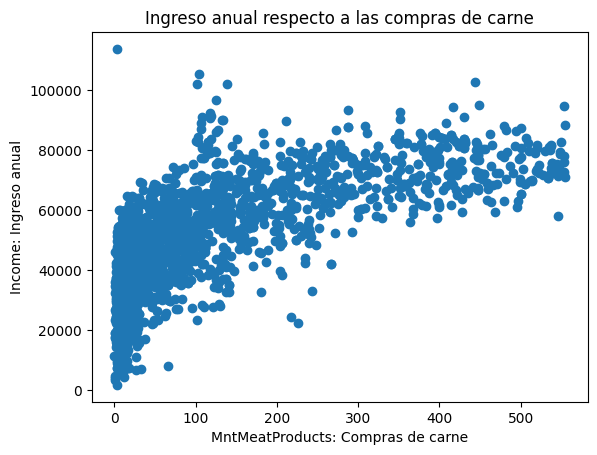

In [44]:
x = df['MntMeatProducts']
y = df['Income']
plt.scatter(x,y)
plt.title('Ingreso anual respecto a las compras de carne')
plt.xlabel('MntMeatProducts: Compras de carne')
plt.ylabel('Income: Ingreso anual')